In [1]:
# This converts the linear regression output to a probability
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore') 

## Create a logistic regression model

In [2]:
# Copied from etl_workflow for convenience
churn_db = pd.read_csv("../Resources/BankChurners.csv", low_memory=False)
clean_churn_db=churn_db.iloc[:,2:21]
clean_churn_db = pd.get_dummies(clean_churn_db)
x = clean_churn_db
y = pd.get_dummies(churn_db["Attrition_Flag"]).iloc[:,0]

In [3]:
# Split our data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [4]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=10000) 


In [5]:
# Fit (train) our model by using the training data
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [6]:
# Display Results
print(f"Training Data Score: {lr_model.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test, y_test)}")

Training Data Score: 0.8905859117840684
Testing Data Score: 0.891785150078989


## Logistic ROC curve

In [7]:
# Create a StandardScaler() model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [8]:
# Transform the training and testing data by using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Get the probability for each class in the model
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:,1]

In [10]:
# Get the ROC curve data for the logistic regression model
# Import the roc_curve module from scikit-learn
from sklearn.metrics import roc_curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)

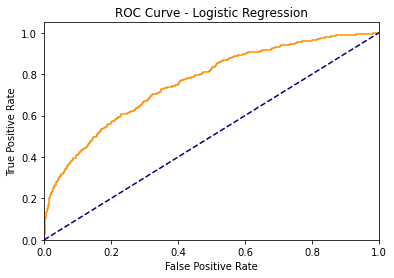

In [11]:
plt.figure()
plt.plot(fpr_lr, tpr_lr, color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.show()

In [12]:
plot = pd.DataFrame({"x":fpr_lr,"y1":tpr_lr})
plot.to_csv('../Outputs/LogReg_ROC.csv')

## Compute AUC

In [13]:
# Compute AUC for the logistic regression model
from sklearn.metrics import auc


roc_auc_lr = auc(fpr_lr, tpr_lr)
print(f"AUC for the Logistic Regression Model: {roc_auc_lr}")

AUC for the Logistic Regression Model: 0.761427153528705


In [14]:
# Show the confusion matrix for the logistic regression model
from sklearn.metrics import confusion_matrix

y_pred_lr = lr_model.predict(X_test_scaled)
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[1162  965]
 [  83  322]]


In [15]:
# Print the classification report for the logistic regression model
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.55      0.69      2127
           1       0.25      0.80      0.38       405

    accuracy                           0.59      2532
   macro avg       0.59      0.67      0.53      2532
weighted avg       0.82      0.59      0.64      2532

